In [33]:
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import numpy as np

In [34]:
xi = [0, 1, 2] # values of indep. variable
yi = [1, 3, 2] # values if dep. variable

N=100
x = np.linspace(0, 2, N) # proxy for continuous indep. variable

In [35]:
# solve M a = b, where eqn is matrix representation of eight constraits on parameters of piece-wise, cubic polynomial interpolation
b = np.array([1, 3, 3, 2, 0, 0, 0, 0]) # ( y1, y2, y2, y3, 0, 0, 0, 0)

M = np.array([[0, 0, 0, 1, 0, 0, 0, 0], # ( x1^3, x1^2, x1^1, 1, 0, 0, 0, 0)
              [0, 0, 0, 0, 1, 1, 1, 1], # etc.
              [1, 1, 1, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 8, 4, 2, 1],
              [3, 2, 1, 0,-3,-2,-1, 0],
              [6, 2, 0, 0,-6,-2, 0, 0],
              [0, 2, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0,12, 2, 0, 0]] )

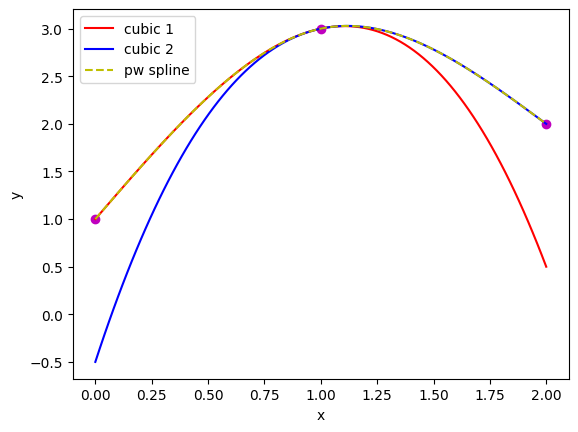

In [36]:
a = np.dot(linalg.inv(M), b) # solve M a = b for vector a of spline coeffcients
S1 = a[0]*x**3 + a[1]*x**2 + a[2]*x + a[3] # define piece-wise spline 1
S2 = a[4]*x**3 + a[5]*x**2 + a[6]*x + a[7] # define piece-wise spline 1
y =  np.concatenate((S1[:N//2], S2[-(N//2):]))

plt.plot(xi,yi,"mo")
plt.plot(x,S1,"r-",label="cubic 1")
plt.plot(x,S2,"b-",label="cubic 2")
plt.plot(x,y,"y",label="pw spline",linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()


Coefficients:
 [[-0.75  0.75]
 [ 0.   -2.25]
 [ 2.75  0.5 ]
 [ 1.    3.  ]]

Breakpoints:
 [0. 1. 2.]


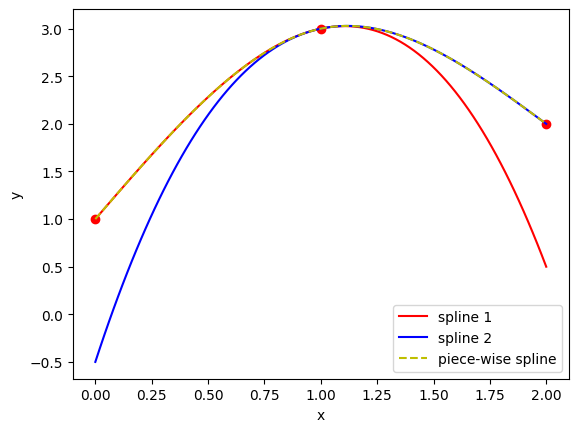

In [37]:
# solve using 'Cubic.Spline' piece-wise, cubic polynomial interpolation function from scipy.interpolate module
p = interpolate.CubicSpline(xi, yi, bc_type='natural') # 'natural' adds constraints at end points, returns a Piecewise polynomial PPoly object
print("\nCoefficients:\n", p.c)
print("\nBreakpoints:\n", p.x)
y = p(x)

plt.plot(xi, yi, 'ro')
plt.plot(x,S1,"r-",label="spline 1")
plt.plot(x,S2,"b-",label="spline 2")
plt.plot(x,y,'y',label="piece-wise spline",linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()